Y(x) = 0.7166666666666667x + 19.18888888888889


Text(0.5, 1.0, 'Linear Fit with Matplotlib')

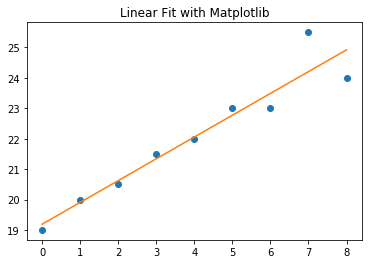

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pylab

from numpy import arange,array,ones
from scipy import stats

y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

xi = arange(0, len(y))
A = array([xi, ones(len(y))])

slope, intercept, r_value, p_value, std_err = stats.linregress(xi, y)
line = slope * xi + intercept

print('Y(x) = {0}x + {1}'.format(slope, intercept))

plt.plot(xi, y, 'o', xi, line)
pylab.title('Linear Fit with Matplotlib')

In [6]:
import logging
import random
from math import hypot

MIN_NB_OF_TRUCKS = 2
MAX_NB_OF_TRUCKS = 5

MIN_TRUCK_CAPACITY = 50
MAX_TRUCK_CAPACITY = 100

MIN_NB_OF_NODES = 10
MAX_NB_OF_NODES = 10

MIN_NODE_Y = 0
MAX_NODE_Y = 100

MIN_NODE_X = 0
MAX_NODE_X = 100

MIN_DEMAND = 1
MAX_DEMAND = 25

#change this to use a custom seed
SEED = None

logging.basicConfig(filename='logs.log',
                    format='%(asctime)s %(levelname)-8s %(message)s',
                    level=logging.INFO,
                    datefmt='%Y-%m-%d %H:%M:%S')

if SEED is None:
    random.seed()
    SEED = random.random()

random.seed(SEED)

logging.info('Seed : {0}'.format(SEED))

citiesCount = random.randint(MIN_NB_OF_NODES, MAX_NB_OF_NODES)

instance = {
    'trucksCount' : random.randint(MIN_NB_OF_TRUCKS, MAX_NB_OF_TRUCKS),
    'trucksCapacity' : random.randint(MIN_TRUCK_CAPACITY, MAX_TRUCK_CAPACITY),
    'nodes' : [],
    'matrix' : [[0]*citiesCount for i in range(citiesCount)]
}

totalDemand = 0
totalDeliveryCapacity = instance['trucksCount'] * instance['trucksCapacity']

for i in range(0, citiesCount):
    nodeX = random.randint(MIN_NODE_X, MAX_NODE_X)
    nodeY = random.randint(MIN_NODE_Y, MAX_NODE_Y)
    demand = random.randint(MIN_DEMAND, MAX_DEMAND)
    instance['nodes'].append({'id':i, 'x':nodeX, 'y':nodeY, 'demand':demand})
    
    totalDemand += demand
    if totalDemand > totalDeliveryCapacity:
        instance['trucksCapacity'] += math.ceil((totalDemand - totalDeliveryCapacity) / instance['trucksCount'])

for fromNode in instance['nodes']:
    for toNode in instance['nodes'][fromNode['id']:citiesCount]:
        dist = int(hypot(toNode['x'] - fromNode['x'], toNode['y'] - fromNode['y']))
        instance['matrix'][fromNode['id']][toNode['id']] = dist
        instance['matrix'][toNode['id']][fromNode['id']] = dist
    
#for i in range(0, citiesCount):
    #print(instance['matrix'][i])

#print(instance)

In [13]:
from parse import parse
from math import hypot

fileName = "input.txt"

instance = {
    'nodes' : list()
}

citiesCount = None

with open(fileName, 'rt') as myFile:
    python_ne_sait_pas_faire_des_iterators_section = 0
    
    for line in myFile.readlines():
        if line.startswith("NAME : "):
            instance['name'] = parse('NAME : {}', line)[0]
        elif line.startswith("COMMENT : "):
            temp, instance['trucksCount'], instance['optimalValue'] = parse('COMMENT : {} No of trucks: {}, Optimal value: {})', line)            
        elif line.startswith("TYPE : "):
            continue
        elif line.startswith("DIMENSION : "):
            citiesCount = int(parse('DIMENSION : {}', line)[0])
        elif line.startswith("EDGE_WEIGHT_TYPE : "):
            continue
        elif line.startswith("CAPACITY : "):
            instance['trucksCapacity'] = int(parse('CAPACITY : {}', line)[0])
        elif line.startswith("NODE_COORD_SECTION "):
            python_ne_sait_pas_faire_des_iterators_section = 1
            continue
        elif line.startswith("DEMAND_SECTION "):
            python_ne_sait_pas_faire_des_iterators_section = 2
            continue
        elif line.startswith("DEPOT_SECTION "):
            python_ne_sait_pas_faire_des_iterators_section = 3
            continue
            
        #ni des switch...
        if python_ne_sait_pas_faire_des_iterators_section == 1:
            id, x, y = parse(' {} {} {}', line)
            instance['nodes'].append({'id':int(id) - 1, 'x':int(x), 'y':int(y)})
        elif python_ne_sait_pas_faire_des_iterators_section == 2:
            id, demand = parse('{} {}', line)
            instance['nodes'][int(id) - 1]['demand'] = demand[:-1]
        elif python_ne_sait_pas_faire_des_iterators_section == 3:
            instance['depotNodeId'] = int(parse(' {}', line)[0])
            break;

if citiesCount is None:
    raise Exception('CitiesCount cannot be None, verify that the input file as a valid format')
    
instance['matrix'] = [[0]*citiesCount for i in range(citiesCount)]
print(citiesCount)
            
for fromNode in instance['nodes']:
    for toNode in instance['nodes'][fromNode['id']:citiesCount]:
        dist = int(hypot(toNode['x'] - fromNode['x'], toNode['y'] - fromNode['y']))
        instance['matrix'][fromNode['id']][toNode['id']] = dist
        instance['matrix'][toNode['id']][fromNode['id']] = dist

print(instance)

32
{'nodes': [{'id': 0, 'x': 82, 'y': 76, 'demand': '0'}, {'id': 1, 'x': 96, 'y': 44, 'demand': '19'}, {'id': 2, 'x': 50, 'y': 5, 'demand': '21'}, {'id': 3, 'x': 49, 'y': 8, 'demand': '6'}, {'id': 4, 'x': 13, 'y': 7, 'demand': '19'}, {'id': 5, 'x': 29, 'y': 89, 'demand': '7'}, {'id': 6, 'x': 58, 'y': 30, 'demand': '12'}, {'id': 7, 'x': 84, 'y': 39, 'demand': '16'}, {'id': 8, 'x': 14, 'y': 24, 'demand': '6'}, {'id': 9, 'x': 2, 'y': 39, 'demand': '16'}, {'id': 10, 'x': 3, 'y': 82, 'demand': '8'}, {'id': 11, 'x': 5, 'y': 10, 'demand': '14'}, {'id': 12, 'x': 98, 'y': 52, 'demand': '21'}, {'id': 13, 'x': 84, 'y': 25, 'demand': '16'}, {'id': 14, 'x': 61, 'y': 59, 'demand': '3'}, {'id': 15, 'x': 1, 'y': 65, 'demand': '22'}, {'id': 16, 'x': 88, 'y': 51, 'demand': '18'}, {'id': 17, 'x': 91, 'y': 2, 'demand': '19'}, {'id': 18, 'x': 19, 'y': 32, 'demand': '1'}, {'id': 19, 'x': 93, 'y': 3, 'demand': '24'}, {'id': 20, 'x': 50, 'y': 93, 'demand': '8'}, {'id': 21, 'x': 98, 'y': 14, 'demand': '12'}, {